In [18]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal
import modules.anal_func as anal_func

In [48]:
snap = 104
n = 1
sb = anal.Simba('cis', size='50_noagn')
z = sb.get_z_from_snap(snap)
print(f'Snap {snap} is at z={z}')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)
print(snapfile)

Snap 104 is at z=1.022199708398802
/mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/noagn/snap_m50n512_104.hdf5


In [49]:
ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = [i for i in obj.galaxies if i.GroupID == n][0]
center = gal.pos.in_units('kpc').value

data = ad['PartType0', 'Temperature'][gal.glist]
#hi_ab = ds.arr(data, 'code_mass').in_units('Msun').value
hi_ab = ad['PartType0', 'Temperature'][gal.glist].in_units('K').value

yt : [INFO     ] 2024-10-24 13:25:02,002 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-24 13:25:02,018 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-24 13:25:02,020 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-24 13:25:02,103 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-24 13:25:02,104 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-24 13:25:02,105 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-24 13:25:02,106 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-24 13:25:02,107 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-24 13:25:02,107 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-24 13:25:02,108 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-24 13:25:02,109 Parame

(array([1.3300000e+02, 2.2819000e+04, 3.5530390e+06, 1.7869020e+07,
        6.9659305e+07, 2.2987075e+07, 3.1416080e+06, 1.6907020e+06,
        1.4730570e+06, 5.7223340e+06]),
 array([-0.59259466,  0.48341391,  1.55942249,  2.63543106,  3.71143964,
         4.78744821,  5.86345679,  6.93946536,  8.01547394,  9.09148251,
        10.16749109]),
 <BarContainer object of 10 artists>)

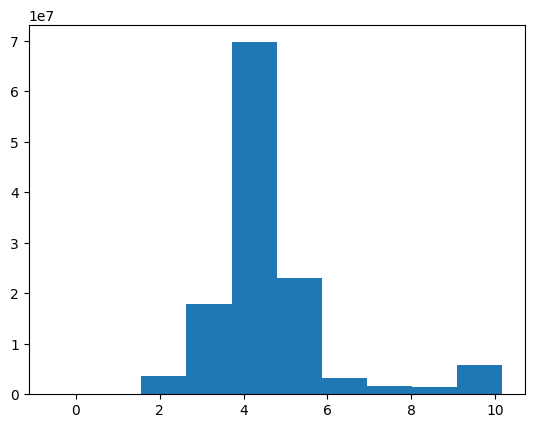

In [17]:
plt.hist(np.log10(hi_ab))

(array([ 140.,    0.,    0.,    6.,   61.,  119.,  102.,  250., 1236.,
        1317.]),
 array([3.30764752, 3.51366031, 3.71967311, 3.9256859 , 4.1316987 ,
        4.3377115 , 4.54372429, 4.74973709, 4.95574988, 5.16176268,
        5.36777548]),
 <BarContainer object of 10 artists>)

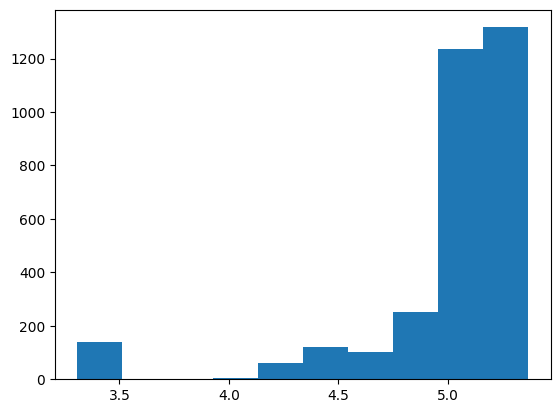

In [36]:
plt.hist(np.log10(hi_ab))

In [50]:
pos = ad['PartType0', 'Coordinates'].in_units('kpc').value[gal.glist]

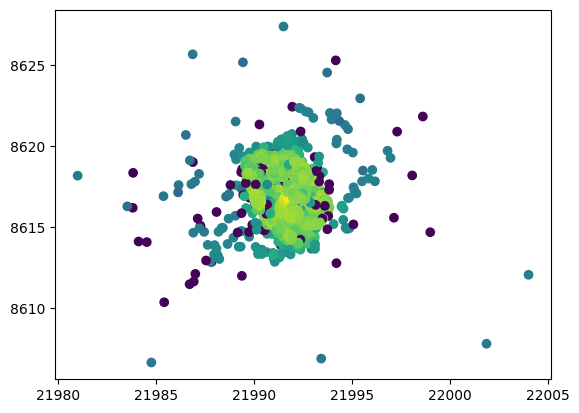

In [51]:
plt.scatter(pos[:, 0], pos[:, 2], c=np.log10(hi_ab))
#plt.ylim(23830, 23842)

In [52]:
print(ds.field_list)

[('PartType0', 'AGS-Softening'), ('PartType0', 'Coordinates'), ('PartType0', 'DelayTime'), ('PartType0', 'Density'), ('PartType0', 'Dust_Masses'), ('PartType0', 'Dust_Metallicity'), ('PartType0', 'ElectronAbundance'), ('PartType0', 'FractionH2'), ('PartType0', 'GrackleHI'), ('PartType0', 'GrackleHII'), ('PartType0', 'GrackleHM'), ('PartType0', 'GrackleHeI'), ('PartType0', 'GrackleHeII'), ('PartType0', 'GrackleHeIII'), ('PartType0', 'HaloID'), ('PartType0', 'ID_Generations'), ('PartType0', 'InternalEnergy'), ('PartType0', 'Masses'), ('PartType0', 'Metallicity_00'), ('PartType0', 'Metallicity_01'), ('PartType0', 'Metallicity_02'), ('PartType0', 'Metallicity_03'), ('PartType0', 'Metallicity_04'), ('PartType0', 'Metallicity_05'), ('PartType0', 'Metallicity_06'), ('PartType0', 'Metallicity_07'), ('PartType0', 'Metallicity_08'), ('PartType0', 'Metallicity_09'), ('PartType0', 'Metallicity_10'), ('PartType0', 'NWindLaunches'), ('PartType0', 'NeutralHydrogenAbundance'), ('PartType0', 'ParticleI